# QBITS Basic Utility

##  Sesion 6_1 Electron Cheapest Path on QAOA

### UDL + 5E Model — Duration: 2 hours

---

## 1 Engage — Choosing the Cheapest Path

> “Imagine an electron that wants to cross a small network.  
> There are **two possible paths** to reach the destination.  
> Each path has a **cost** — like a ticket the electron must pay to pass.”

> “One path is cheap.  
> The other is more expensive.  
> If the electron could *sense* the cost, which path would it prefer?”

Now add a twist:

> “Instead of choosing directly, the electron explores **both paths at once**.  
> It feels the cost of each path as a phase —  
> and interference decides where it finally appears.”

This simple story hides a powerful idea:

> *Nature tends to minimize cost.*

---

**Guiding Questions:**
- How would a system “know” which path is cheaper?
- Can cost be represented as something other than money?
- What if choosing both paths at the same time helps us decide better?

---

**Brief Activity (Physical Analogy):**
- Draw **two paths** on the board leading to the same point.
- Label one path with cost **1** and the other with cost **2**.
- Ask:
> “If an electron had to pay a ticket to pass, which path should dominate?”

Then add:
> “What if the electron doesn’t choose immediately —  
> what if it explores both paths before deciding?”

---

**Physical Concept:**  
In physics, **energy plays the role of cost**.  
Systems naturally evolve toward **minimum energy configurations**.

In quantum computing:
- Costs are encoded into a **Hamiltonian**
- Lower cost → lower energy
- The algorithm favors states with **minimum expected energy**

---

**Learning Objective:**  
Understand how an optimization problem can be reframed as a **physical energy minimization**, preparing the ground for the Quantum Approximate Optimization Algorithm (QAOA).


## 2 Explore — Exploring Paths Without Computing

> *Before writing any equations or circuits, we explore the idea physically and visually.*

### Guided Exploration (No Code)

Imagine the electron at the entrance of the network.

- It has **two possible paths** to reach the same destination.
- Each path has an associated **cost**:
  - Path A → cost = 1
  - Path B → cost = 2

Instead of choosing immediately, the electron:
- explores **both paths simultaneously**
- accumulates “experience” from each path
- is later more likely to appear where the cost was lower

---

### Physical Board Activity (Teacher-Led)

1. Draw **two paths** on the board leading to the same endpoint.
2. Write:
   - Path A → cost = 1
   - Path B → cost = 2
3. Place a small mark or arrow representing the electron at the start.

Now ask the group:

> “If the electron explores both paths at the same time,  
> how could the *cost* influence its final position?”

Extend the idea:

- Represent **cost** as:
  - friction
  - height (energy)
  - time delay
  - or resistance

---

### Conceptual Bridge (Key Intuition)

- In classical systems, we **evaluate costs and choose**.
- In quantum systems, we **encode costs into phases**.
- Paths with higher cost accumulate more phase.
- Interference makes high-cost paths cancel out.

> *The system does not compare numbers —  
> it lets physics do the comparison.*

---

### Guiding Questions for Discussion

- What does “cost” mean in physical terms?
- Can energy, time, or resistance play the same role?
- Why might exploring both options be better than choosing early?
- How could interference help suppress expensive choices?

---

### Learning Outcome 

Develop intuition that:
- Optimization can be seen as **energy shaping**
- Lower cost paths become more probable **without explicit decision-making**



## 4 Explain (Extension) — From Binary Choice to the Ising Cost Model

> *How does a simple “yes / no” decision become a quantum Hamiltonian?*  
This section answers that question **step by step**.

---

### 3.7 Step 1 — Binary Decision Variables

We start with **classical binary variables**:

$$
x_i \in \{0,1\}
$$

Meaning:
- $x_i = 0$: option not chosen  
- $x_i = 1$: option chosen  

For two possible paths:
- $x_0$: choose path A  
- $x_1$: choose path B  

---

### 3.8 Step 2 — Classical Cost Function

Suppose:
- Path A has cost 1  
- Path B has cost 2  
- Choosing both paths is forbidden (penalty)

A classical cost function can be written as:

$$
C(x_0, x_1) = 1 \cdot x_0 + 2 \cdot x_1 + P \cdot x_0 x_1
$$

Where:
- The first two terms encode individual costs  
- The last term penalizes invalid configurations  
- $P$ is a large positive constant  

---

### 3.9 Step 3 — From Binary Variables to Spins

Quantum hardware does not work with $x \in \{0,1\}$.  
Instead, it works with **spin variables**:

$$
s_i \in \{+1, -1\}
$$

The mapping is:

$$
x_i = \frac{1 - s_i}{2}
$$

This transformation allows us to rewrite the cost function in terms of spins.

---

### 3.10 Step 4 — Rewrite the Cost in Spin Form

Substitute $x_i = \frac{1 - s_i}{2}$ into the cost function.

After expansion and simplification, the cost becomes:

$$
C(s_0, s_1) = c_0 + c_1 s_0 + c_2 s_1 + c_{12} s_0 s_1
$$

Where:
- $c_0$ is a constant offset  
- $c_1, c_2$ are local fields  
- $c_{12}$ is a coupling term  

> The constant term shifts all energies equally and does **not** affect optimization.

---

### 3.11 Step 5 — From Spins to Pauli Operators

In quantum mechanics:
- Spin variables become **Pauli-Z operators**

$$
s_i \rightarrow Z_i
$$

This gives the **Ising Hamiltonian**:

$$
H_C = c_0 I + c_1 Z_0 + c_2 Z_1 + c_{12} Z_0 Z_1
$$

This is exactly the form used in QAOA.

---

### 3.12 Step 6 — Interpretation

Each computational basis state:

$$
|00\rangle,\ |01\rangle,\ |10\rangle,\ |11\rangle
$$

is an **eigenstate of the Hamiltonian**, with energy equal to its cost.

> QAOA does not “search” for the minimum —  
> it **reshapes the energy landscape** so that the minimum dominates.

---

### Teaching Note (Board Construction)

> On the board:
> 1. Start with a table of $x_0, x_1$  
> 2. Write the classical cost  
> 3. Replace $x_i$ with $\frac{1 - s_i}{2}$  
> 4. Circle the $s_i s_j$ terms  
> 5. Replace them with $Z_i Z_j$  

This physical construction helps demystify the Ising model.

---

### Key Pedagogical Message

> **QAOA is not magic.**  
> It is a systematic translation:
>
> Binary decision → cost function → Ising model → quantum circuit


## 4️ Elaborate — From Ising Hamiltonian to QAOA Circuit (Hands-on)

In this section, we **implement** the ideas developed so far:

- Binary decisions  
- Cost function  
- Ising Hamiltonian  
- Quantum evolution via QAOA  

We will **not add new theory**, only *connect concepts to executable structure*.

---

### 4.1 Problem Reminder — Two Paths, Different Costs

We model a system with:

- Two binary decisions (two qubits)
- One path with cost **1**
- One path with cost **2**
- A constraint that favors choosing the **lower-cost path**

Our goal:
> Use QAOA to amplify the probability of the **minimum-cost configuration**.
> From the previous Explain section, we obtained an Ising Hamiltonian of the form:

$$
H_C = c_0 I + c_1 Z_0 + c_2 Z_1 + c_{12} Z_0 Z_1
$$

In code, this Hamiltonian is encoded as a `SparsePauliOp`:

Interpretation:

>"ZI" applies a local field on qubit 0

>"IZ" applies a stronger local field on qubit 1

>"ZZ" couples both decisions

>"II" is a constant energy offset (does not affect optimization)


```python
from qiskit.quantum_info import SparsePauliOp

hamiltonian_op = SparsePauliOp.from_list([
    ("II", 4.0),
    ("ZI", -0.5),
    ("IZ", -1.0),
    ("ZZ", 2.5)
])


### From Cost Function to Quantum Circuit

In this section, we move from **conceptual understanding** to **explicit construction**.

So far, we have:
- Defined a decision problem (choosing the lower-cost path).
- Expressed this decision as a **binary optimization problem**.
- Mapped that problem into an **Ising cost Hamiltonian**.

Now, we will:
1. Translate the cost Hamiltonian into quantum operations.
2. Build a QAOA circuit step by step.
3. Observe how quantum evolution favors lower-cost solutions.

Important:
> At this stage, we are **not optimizing yet**.  
> We are learning how the quantum circuit encodes the cost structure.

This block focuses on **structure**, not performance.


In [1]:
# ============================================
# 4.1 Cost Hamiltonian Definition
# ============================================

from qiskit.quantum_info import SparsePauliOp

# The cost Hamiltonian encodes the decision problem
# Each Pauli term contributes to the total energy
hamiltonian_op = SparsePauliOp.from_list([
    ("II", 4.0),    # Constant energy offset (does not affect optimization)
    ("ZI", -0.5),   # Linear cost term on qubit 0
    ("IZ", -1.0),   # Linear cost term on qubit 1
    ("ZZ", 2.5)     # Interaction term between qubit 0 and qubit 1
])

# This Hamiltonian will be used to evaluate the energy
# of the quantum state produced by the QAOA circuit


### Conceptual Checkpoint

- Each basis state (00, 01, 10, 11) corresponds to a decision.
- The Hamiltonian assigns **different energies** to each decision.
- QAOA will try to concentrate probability on the **lowest-energy state**.

We have not built any circuit yet.
We have only defined *what it means for a solution to be good*.


## 4.2 Cost Unitary — Turning Cost into Quantum Dynamics

Once the cost Hamiltonian $H_C$ is defined, QAOA uses it to **evolve the quantum state in time**.

The cost unitary is defined as:

$$
U_C(\gamma) = e^{-i \gamma H_C}
$$

Where:
- $\gamma$ is a tunable parameter (a "time" or "strength")
- States with **higher cost accumulate more phase**
- States with **lower cost accumulate less phase**

Important idea:
> QAOA does **not** remove bad solutions.
> It **rotates their phases**, preparing them for interference later.

---

### How Pauli-Z Terms Become Rotations

Each term in the Hamiltonian produces a specific rotation:

| Hamiltonian Term | Quantum Gate |
|------------------|-------------|
| $Z_i$            | $R_Z(2\gamma c)$ |
| $Z_i Z_j$        | CNOT – $R_Z$ – CNOT |

This decomposition is exact and hardware-compatible.


In [2]:
# ============================================
# 4.2 Cost Unitary U_C(gamma)
# ============================================

from qiskit import QuantumCircuit

def apply_cost_unitary(qc, gamma):
    """
    Applies the cost unitary U_C(gamma) = exp(-i * gamma * H_C)
    using native quantum gates.
    """

    # Term: -0.5 * Z0
    # Corresponds to a single-qubit Z rotation on qubit 0
    qc.rz(2 * gamma * (-0.5), 0)

    # Term: -1.0 * Z1
    # Corresponds to a single-qubit Z rotation on qubit 1
    qc.rz(2 * gamma * (-1.0), 1)

    # Term: 2.5 * Z0 Z1
    # Implemented using an entangling sequence:
    # CNOT -> RZ -> CNOT
    qc.cx(0, 1)
    qc.rz(2 * gamma * 2.5, 1)
    qc.cx(0, 1)


### What Is Really Happening?

- Every basis state acquires a **phase** proportional to its cost.
- High-cost solutions rotate faster.
- Low-cost solutions rotate slower.

At this point:
- Probabilities are unchanged.
- Information is stored **only in the phase**.

This is why QAOA needs a **mixer**:
> Without interference, phase alone cannot change outcomes.


> Teaching Tip:
> 
> Pause here and emphasize:
> - QAOA does **not measure** during optimization.
> - The algorithm works by sculpting **interference patterns**.
> - Cost first, mixing later.


## 4.3 Mixer Unitary — Turning Phase into Probability

After applying the cost unitary $U_C(\gamma)$, the quantum state has changed **only in phase**.

But:
> **Measurements do not see phase directly.**

To transform phase differences into measurable probability differences, QAOA applies a **mixer**.

The standard QAOA mixer is defined as:

$$
U_M(\beta) = e^{-i \beta \sum_i X_i}
$$

Where:
- $\beta$ is a tunable parameter
- $X_i$ is the Pauli-X operator on qubit $i$
- The mixer allows probability amplitude to **flow between computational states**

---

### Physical Intuition

- $U_C(\gamma)$ “marks” states by rotating their phase.
- $U_M(\beta)$ **mixes** those states together.
- Constructive and destructive interference emerges.

Think of it as:
> Phase → Interference → Probability bias


### Why Use $X$ as the Mixer?

The Pauli-X operator:
- Swaps $|0\rangle \leftrightarrow |1\rangle$
- Allows exploration of the full computational space
- Does not privilege any single bitstring

This makes it an **unbiased quantum walk** over solutions.

In QAOA:
- The cost Hamiltonian defines *where we want to go*
- The mixer defines *how freely we can move*


In [3]:
# ============================================
# 4.3 Mixer Unitary U_M(beta)
# ============================================

def apply_mixer_unitary(qc, beta):
    """
    Applies the mixer unitary U_M(beta) = exp(-i * beta * sum(X_i))
    using RX rotations on all qubits.
    """

    for q in range(2):
        # RX rotation corresponds to exp(-i * beta * X)
        qc.rx(2 * beta, q)


### Observable Consequences

After applying $U_M(\beta)$:

- Amplitudes redistribute across states
- Some states become more likely
- Others become suppressed

Now:
- Phase information becomes **measurable**
- Optimization becomes meaningful

This is the first moment in QAOA where
> **probabilities begin to reflect cost**


> Teaching Tip:
>
> Ask participants:
> - What happens if $\beta = 0$?
> - What happens if $\beta$ is too large?
>
> Emphasize:
> Optimization is about balancing
> **marking (cost)** and **exploration (mixing)**.


> ### Cost + Mixer = QAOA Layer

One QAOA layer consists of:

1. Cost Unitary $U_C(\gamma)$  
2. Mixer Unitary $U_M(\beta)$  

Repeated layers refine interference patterns.

This completes one full **QAOA step**.


## 4.4 Full QAOA Circuit — One Layer (p = 1)

A single QAOA layer consists of:

1. **Initialization**  
2. **Cost Unitary** $U_C(\gamma)$  
3. **Mixer Unitary** $U_M(\beta)$  

This sequence is repeated $p$ times in general.
In this session, we focus on **p = 1** to make the mechanism transparent.

---

### Mathematical Structure

The full QAOA state is:

$$
|\psi(\gamma, \beta)\rangle =
U_M(\beta)\, U_C(\gamma)\, |+\rangle^{\otimes n}
$$

Where:
- $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$
- $\gamma, \beta$ are classical parameters
- $n$ is the number of qubits


### Physical Picture

- Initialization prepares **all possible solutions equally**
- $U_C(\gamma)$ assigns a phase cost to each solution
- $U_M(\beta)$ converts phase differences into probability bias

The circuit behaves like a **quantum interference engine**:
> Lower-cost solutions interfere constructively  
> Higher-cost solutions interfere destructively


In [4]:
# ============================================
# 4.4 Full QAOA Circuit (p = 1)
# ============================================

from qiskit import QuantumCircuit

def build_qaoa_circuit(gamma, beta):
    """
    Builds a p=1 QAOA circuit for a 2-qubit problem.
    """

    qc = QuantumCircuit(2)

    # --- Step 1: Initialization ---
    # Prepare uniform superposition |+>^n
    qc.h([0, 1])

    # --- Step 2: Cost Unitary U_C(gamma) ---
    apply_cost_unitary(qc, gamma)

    # --- Step 3: Mixer Unitary U_M(beta) ---
    apply_mixer_unitary(qc, beta)

    return qc


### Visual Inspection

Before running any optimization:
- Always draw the circuit
- Verify the logical structure
- Identify cost vs mixer blocks


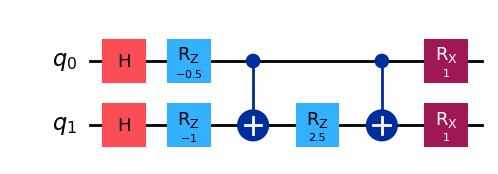

In [5]:
# Example parameters for inspection
gamma_test = 0.5
beta_test = 0.5

qc_test = build_qaoa_circuit(gamma_test, beta_test)

# Visualize the circuit
qc_test.draw(output='mpl')


> Teaching Tip:
>
> Pause here and ask:
> - Where is the problem encoded?
> - Where does optimization happen?
> - Which parts are quantum, which are classical?
>
> Highlight:
> QAOA is a **hybrid algorithm**:
> Quantum circuit + classical optimization loop


### What We Have Built

- A quantum circuit that **depends on classical parameters**
- A mechanism to bias probabilities toward low-cost solutions
- A clean foundation for optimization

Next step:
> Measure **how good** a given $(\gamma, \beta)$ pair is.


## 4.5 Evaluate — Energy Expectation and Optimization

At this stage, the quantum circuit is **complete**.
What remains is to answer a single question:

> *How good is a given pair of parameters $(\gamma, \beta)$?*

In QAOA, "goodness" is measured by the **expected value of the cost Hamiltonian**.

This evaluation step:
- Does **not** modify the quantum circuit structure
- Uses the circuit output to compute an energy value
- Feeds that value into a **classical optimizer**


### Expected Cost

For a given QAOA state:

$$
|\psi(\gamma, \beta)\rangle
$$

The cost is evaluated as:

$$
E(\gamma, \beta) =
\langle \psi(\gamma, \beta) | H_C | \psi(\gamma, \beta) \rangle
$$

Where:
- $H_C$ is the cost Hamiltonian
- Lower energy means **better solution**

The optimizer searches for:
$$
(\gamma^*, \beta^*) = \arg\min E(\gamma, \beta)
$$


In [6]:
# ============================================
# 4.5 Energy Evaluation Function
# ============================================

from qiskit import transpile
from qiskit_ibm_runtime import EstimatorV2
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Store energy values for visualization
energy_history = []
backend_aer = AerSimulator()
estimator = EstimatorV2(mode=backend_aer)

def energy(params):
    """
    Computes the expected value of the cost Hamiltonian
    for given QAOA parameters (gamma, beta).
    """
    gamma, beta = params

    # Build QAOA circuit
    qc = build_qaoa_circuit(gamma, beta)

    # Transpile for the backend
    qc_transpiled = transpile(qc, backend_aer)

    # Prepare estimator input
    pub = (qc_transpiled, hamiltonian_op, [])

    # Run estimator
    job = estimator.run([pub])
    result = job.result()[0]

    # Extract energy expectation value
    energy_value = result.data.evs

    # Save for later analysis
    energy_history.append(energy_value)

    return energy_value


### Classical Optimization

We now use a classical optimizer to:
- Propose $(\gamma, \beta)$
- Evaluate energy
- Adjust parameters iteratively

This loop is the **hybrid core** of QAOA.


In [7]:
# ============================================
# Classical Optimizer (COBYLA)
# ============================================

from scipy.optimize import minimize

# Initial guess
initial_params = [0.5, 0.5]

result = minimize(
    energy,
    initial_params,
    method="COBYLA",
    tol=1e-4,
    options={"maxiter": 200}
)

gamma_opt, beta_opt = result.x

print("Optimal gamma =", gamma_opt)
print("Optimal beta  =", beta_opt)
print("Minimum energy ≈", energy([gamma_opt, beta_opt]))


Optimal gamma = 1.7093734677751986
Optimal beta  = 0.4369477900870199
Minimum energy ≈ 2.142333984375


### Energy Convergence Landscape (Optimization Path)

Plotting the energy over iterations reveals:
- Convergence behavior
- Stability of the solution
- Possible local minima


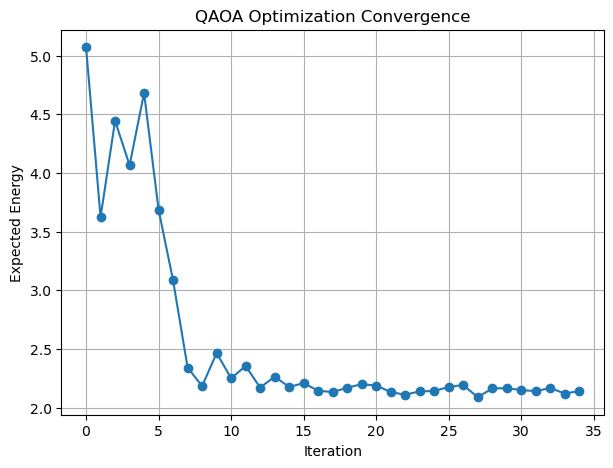

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(energy_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Expected Energy")
plt.title("QAOA Optimization Convergence")
plt.grid(True)
plt.show()


### How to Read the Result

- The optimizer does **not** return a bitstring
- It returns parameters $(\gamma^*, \beta^*)$
- These parameters bias the quantum state toward low-cost solutions

The **solution** emerges after measurement.


In [9]:
from qiskit.quantum_info import Statevector

# Build final optimized circuit
qc_final = build_qaoa_circuit(gamma_opt, beta_opt)

# Obtain final quantum state
final_state = Statevector.from_instruction(qc_final)

# Extract probabilities
probabilities = final_state.probabilities_dict()

print("Final state probabilities:")
for state, prob in probabilities.items():
    print(f"{state}: {prob:.6f}")

# Most probable state (solution)
best_state = max(probabilities, key=probabilities.get)

print("\nOptimal solution state:", best_state)
print("Probability:", probabilities[best_state])


Final state probabilities:
00: 0.193799
01: 0.239188
10: 0.548765
11: 0.018248

Optimal solution state: 10
Probability: 0.5487651780185777


> ## Key Teaching Insight:
>
> QAOA does not *search* for solutions.
> It **reshapes probability**.
>
> Optimization tunes interference,
> not outcomes directly.


### By the End of This Session, Teachers Can:

- Explain QAOA as a hybrid algorithm
- Identify cost vs mixer roles
- Interpret energy expectation values
- Understand optimization as interference control

This prepares the ground for:
> Higher-depth QAOA    
> Variational Quantum Algorithms (VQE)


## 5 Evaluate — Reinforcement and Iterative Understanding of QAOA

QAOA is **not a one-shot algorithm**.

It is a **loop**:
quantum → classical → quantum → classical

Understanding QAOA means understanding how *each stage reinforces the others*.

### The QAOA Learning Loop

| Stage | What We Adjust | What We Learn |
|------|---------------|--------------|
| Cost Hamiltonian | Problem encoding | How the problem becomes energy |
| Mixer | Exploration strategy | How probability is redistributed |
| Parameters $(\gamma, \beta)$ | Interference control | How bias emerges |
| Measurement | Sampling | How solutions appear |
| Optimization | Feedback | How learning happens |

---
> QAOA does not converge because it is "smart".
> It converges because we **listen to feedback**.

### Guiding Reflection Questions

**Cost Function**
- What physical meaning does the Hamiltonian encode?
- If I change a weight, how does the energy landscape change?

**Mixer**
- What happens if the mixer is too strong?
- What happens if it is too weak?

**Parameters**
- Why do small parameter changes matter?
- Can two different parameter sets give similar energies?

**Measurement**
- Why is the optimal solution *probable*, not guaranteed?
- Why do we repeat measurements?

**Optimization**
- Did the optimizer converge smoothly or oscillate?
- What does that tell us about the landscape?

### Reinforcement Exercise: Change One Thing Only

To really learn QAOA, change **one element at a time**:

- Keep the Hamiltonian fixed → vary $\gamma$
- Keep $\gamma$ fixed → vary $\beta$
- Keep parameters fixed → change weights
- Increase depth $p$ by one layer

> This mirrors scientific experimentation:
> isolate variables, observe consequences.

### Scale Does Not Change the Logic

Whether the problem has:
- 2 qubits
- 10 qubits
- 100 qubits

The **QAOA structure remains the same**.

Only:
- the energy landscape becomes more complex
- the optimization becomes harder

> Learning QAOA on small systems is not “simplified QAOA”.
> It is **real QAOA**.

### Teaching Insight (for Instructors)

Encourage teachers to ask:

- Where did my intuition fail?
- Which stage felt most opaque?
- What changed when I adjusted parameters manually?

QAOA rewards:
- curiosity
- patience
- iteration

It punishes:
- memorization
- fixed expectations

> QAOA is not about finding the answer.
> It is about **learning how probability learns**.

### Exit Key Quote

Complete the sentence:

> “I understand QAOA better now because I realized that _____________.”

Optional:
- Sketch the QAOA loop by hand.
- Label where *quantum* and *classical* reasoning meet.


### What Comes Next?

- Why QAOA struggles with noise
- Why deeper circuits are harder
- Why VQE shares the same philosophy

This welcomes to the:
> Variational Quantum Algorithms as a family
